**Analisi e Cleaning dei dati salvati**

Importiamo il file salvato in precedenza salvandolo su un DataFrame. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
from pandas.tools.plotting import scatter_matrix

In [17]:
plt.style.use('fivethirtyeight')

In [18]:
df = pd.read_csv("../../datasets/salute/osservatori_comuni_cleaned.csv")

In [19]:
df.shape

(2256, 26)

In [20]:
df.head(5)

,Unnamed: 0,comune,year,Produzione pro-capite Rifiuti Urbani,Reddito imponibile medio per contribuente,Numero medio componenti per famiglie,% di Raccolta Differenziata,Reddito imponibile medio per residente,Rapporto tra avviamenti/cessazioni (x 100),Rapporto tra avviamenti/cessazioni di stranieri (x 100),...,Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione,Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione,Percentuale di avviamenti a termine,Percentuale studenti con esito negativo - secondaria I grado,Numero interventi di controllo per abitante,Tasso di famiglie che chiedono integrazione canoni di locazione (x 1000),Percentuale studenti stranieri iscritti alle scuole secondarie di primo grado,Percentuale studenti stranieri iscritti alle scuole secondarie di secondo grado,Indice di vecchiaia (x 100),Quoziente di incremento naturale (x 1.000)
0,0,Capolona,2007,515.818354,18679.973587,2.630662,15.614981,10571.769347,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.955202,NaN,NaN,133.066667,2.838221
1,1,Capolona,2008,490.842027,18771.549645,2.600775,18.121024,10847.493852,91.458607,97.260274,...,0,0,80.459770,2.205882,NaN,13.565891,10.294118,6.382979,135.263158,0.745156
2,2,Capolona,2009,439.304991,19125.981512,2.584806,40.819392,10899.334751,97.394137,112.500000,...,NaN,NaN,80.267559,4.402516,1,11.466794,14.743590,6.398104,140.775401,0.739372
3,3,Capolona,2010,389.532185,19690.693186,2.562732,58.694205,10950.381868,115.226940,121.678322,...,0,0,74.587039,1.307190,NaN,15.799257,20.512821,8.196721,143.160691,0.000000
4,4,Capolona,2011,414.453906,20011.717264,5.023481,59.460087,11372.819696,100.405954,119.685039,...,NaN,NaN,79.649596,4.225352,NaN,16.114180,14.084507,6.072874,149.594595,0.000000


Il DataFrame contiene 2256 record e alcune celle contengono dei valori NaN.  

**Esplorazione dati - Correlazioni**

Esploriamo le correlazioni tra una particolare variabile (Percentuale di Raccolta Differenziata) e le altre. 

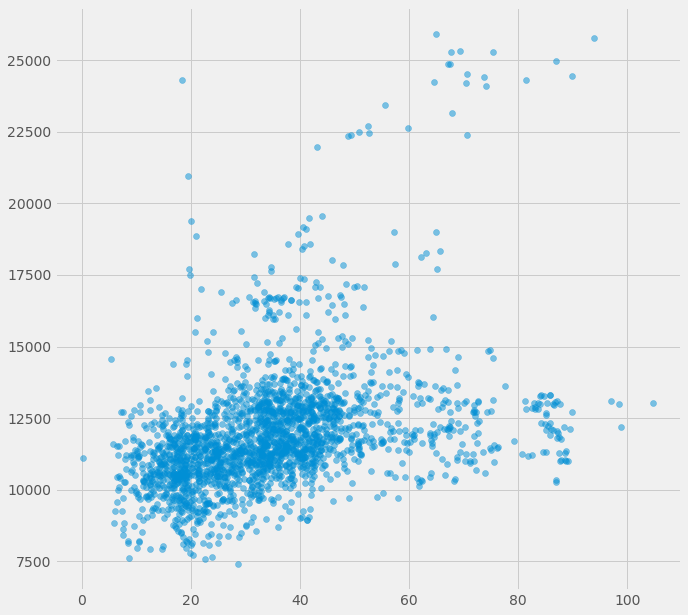

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Reddito imponibile medio per residente"],alpha=0.5)
plt.show()

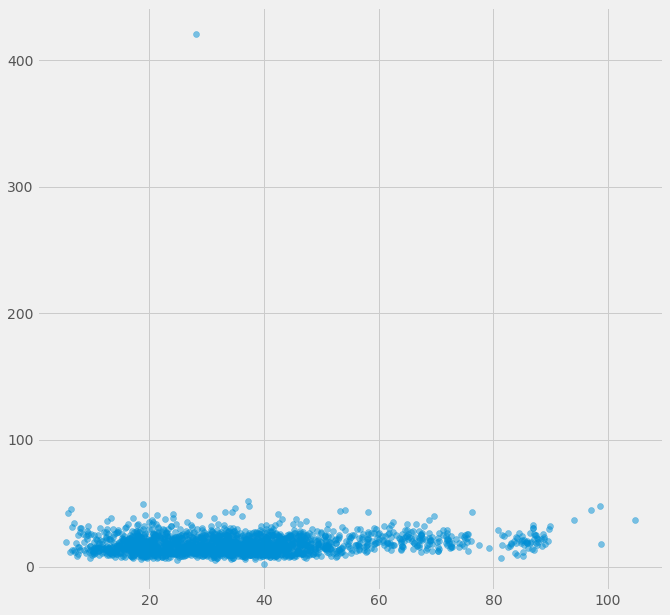

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Tasso grezzo di disoccupazione (x100)"],alpha=0.5)
plt.show()

In [23]:
df[df["Tasso grezzo di disoccupazione (x100)"]>100]

,Unnamed: 0,comune,year,Produzione pro-capite Rifiuti Urbani,Reddito imponibile medio per contribuente,Numero medio componenti per famiglie,% di Raccolta Differenziata,Reddito imponibile medio per residente,Rapporto tra avviamenti/cessazioni (x 100),Rapporto tra avviamenti/cessazioni di stranieri (x 100),...,Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione,Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione,Percentuale di avviamenti a termine,Percentuale studenti con esito negativo - secondaria I grado,Numero interventi di controllo per abitante,Tasso di famiglie che chiedono integrazione canoni di locazione (x 1000),Percentuale studenti stranieri iscritti alle scuole secondarie di primo grado,Percentuale studenti stranieri iscritti alle scuole secondarie di secondo grado,Indice di vecchiaia (x 100),Quoziente di incremento naturale (x 1.000)
999,999,Montecatini Val di Cecina,2014,743.347851,19761.869522,2.10119,28.141685,11222.238122,81.795116,101.211143,...,NaN,NaN,70.7057,NaN,8.333333,NaN,NaN,286.631016,-9.615385,NaN


Una riga presenta un Tasso di disoccupazione sopra il 100%. E' un valore che non ha senso, probabilmente un errore di input dati.
Sostituiamo il valore in quella cella con un NaN e controlliamo che la sostituzione sia andata a buon fine. 

In [24]:
df.set_value(999,'Tasso grezzo di disoccupazione (x100)',np.nan)
df[999:1000]['Tasso grezzo di disoccupazione (x100)']

999   NaN
Name: Tasso grezzo di disoccupazione (x100), dtype: float64

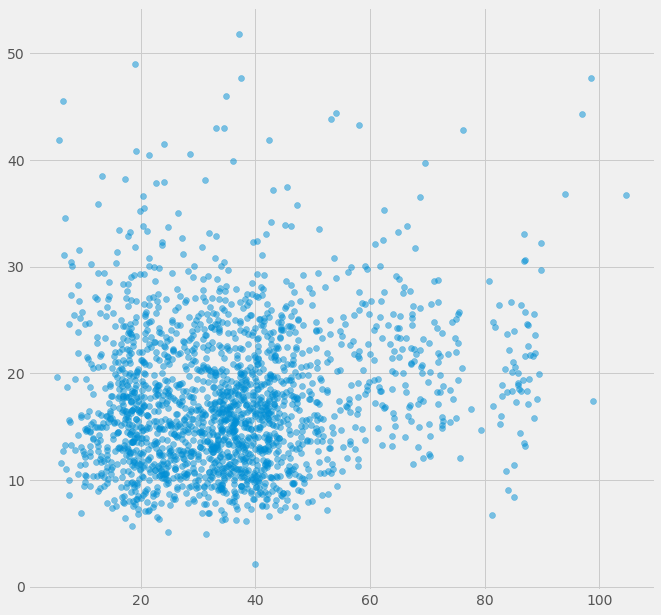

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Tasso grezzo di disoccupazione (x100)"],alpha=0.5)
plt.show()

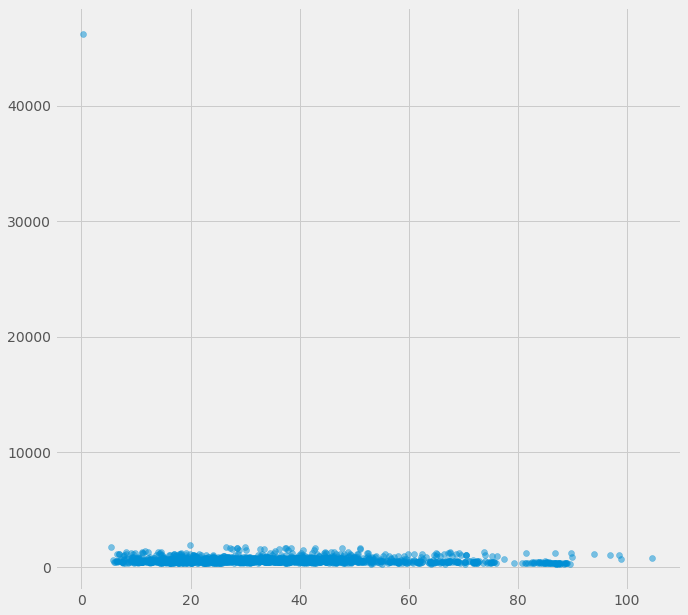

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Produzione pro-capite Rifiuti Urbani"],alpha=0.5)
plt.show()

In [27]:
df[df["Produzione pro-capite Rifiuti Urbani"]>10000]

,Unnamed: 0,comune,year,Produzione pro-capite Rifiuti Urbani,Reddito imponibile medio per contribuente,Numero medio componenti per famiglie,% di Raccolta Differenziata,Reddito imponibile medio per residente,Rapporto tra avviamenti/cessazioni (x 100),Rapporto tra avviamenti/cessazioni di stranieri (x 100),...,Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione,Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione,Percentuale di avviamenti a termine,Percentuale studenti con esito negativo - secondaria I grado,Numero interventi di controllo per abitante,Tasso di famiglie che chiedono integrazione canoni di locazione (x 1000),Percentuale studenti stranieri iscritti alle scuole secondarie di primo grado,Percentuale studenti stranieri iscritti alle scuole secondarie di secondo grado,Indice di vecchiaia (x 100),Quoziente di incremento naturale (x 1.000)
280,280,Pratovecchio,2007,46257.448429,19301.06674,2.24818,0.294661,11105.310695,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.828239,NaN,NaN,213.611111,-4.443034


Una riga presenta una Produzione rifiuti Urbani fuori scala. 
Sostituiamo anche qui con NaN e controlliamo di nuovo il plot.

280   NaN
Name: Produzione pro-capite Rifiuti Urbani, dtype: float64


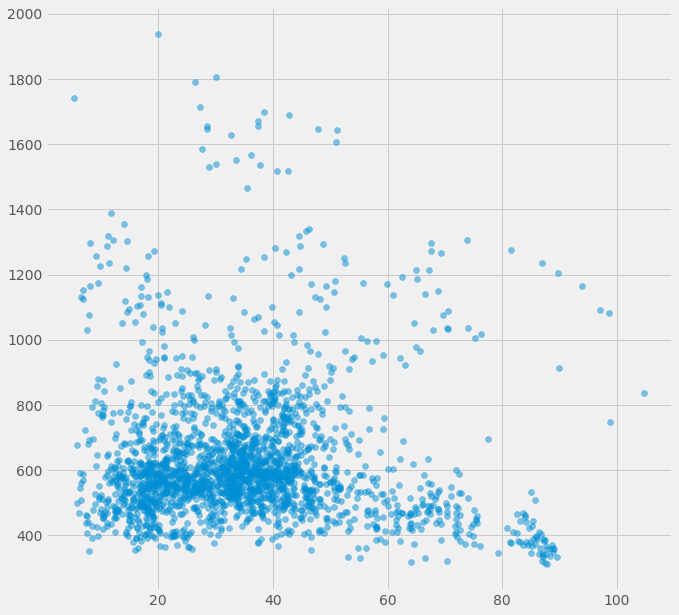

In [28]:
df.set_value(280,'Produzione pro-capite Rifiuti Urbani',np.nan)
print df[280:281]['Produzione pro-capite Rifiuti Urbani']
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Produzione pro-capite Rifiuti Urbani"],alpha=0.5)
plt.show()

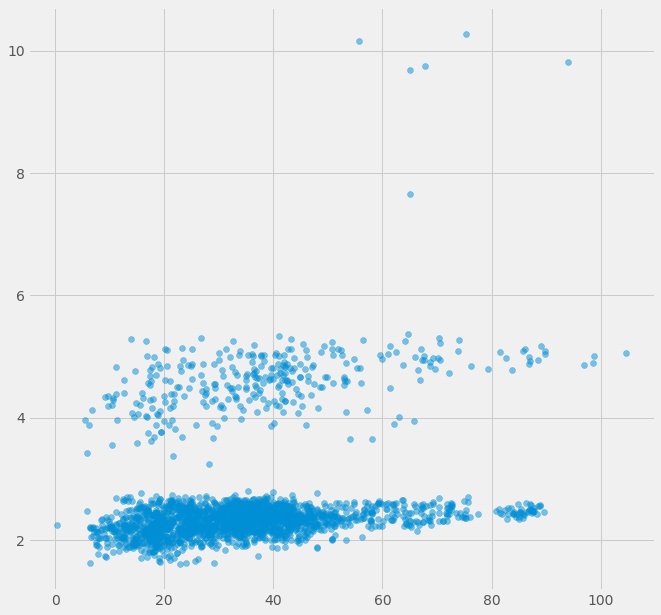

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Numero medio componenti per famiglie"],alpha=0.5)
plt.show()

In [30]:
df[df["Numero medio componenti per famiglie"]>4]

,Unnamed: 0,comune,year,Produzione pro-capite Rifiuti Urbani,Reddito imponibile medio per contribuente,Numero medio componenti per famiglie,% di Raccolta Differenziata,Reddito imponibile medio per residente,Rapporto tra avviamenti/cessazioni (x 100),Rapporto tra avviamenti/cessazioni di stranieri (x 100),...,Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione,Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione,Percentuale di avviamenti a termine,Percentuale studenti con esito negativo - secondaria I grado,Numero interventi di controllo per abitante,Tasso di famiglie che chiedono integrazione canoni di locazione (x 1000),Percentuale studenti stranieri iscritti alle scuole secondarie di primo grado,Percentuale studenti stranieri iscritti alle scuole secondarie di secondo grado,Indice di vecchiaia (x 100),Quoziente di incremento naturale (x 1.000)
4,4,Capolona,2011,414.453906,20011.717264,5.023481,59.460087,11372.819696,100.405954,119.685039,...,NaN,NaN,79.649596,4.225352,NaN,16.114180,14.084507,6.072874,149.594595,0.000000
12,12,Bibbiena,2011,552.362704,21472.475903,4.768377,23.128284,12433.456269,101.930502,113.595707,...,NaN,NaN,93.087121,2.795031,NaN,21.822358,22.981366,17.875211,155.017503,0.081360
20,20,Scandicci,2011,556.335525,23223.244510,4.700746,41.836601,14138.831594,118.543336,119.698871,...,NaN,NaN,77.586631,1.166181,NaN,14.826632,9.985423,7.353731,198.993289,-1.829624
28,28,Santa Maria a Monte,2011,476.209013,20437.354946,5.117402,43.200067,11511.296503,115.709202,125.751073,...,NaN,NaN,84.182777,1.592357,NaN,24.153633,8.280255,6.693712,127.662957,3.574204
32,32,Casciana Terme Lari,2007,1294.043248,40207.103641,5.079675,48.778384,22349.309669,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,34.949033,NaN,NaN,169.489415,-0.652795
33,33,Casciana Terme Lari,2008,1236.147548,39961.613620,5.024530,52.572030,22454.312444,203.854979,230.370370,...,0,0,168.932913,4.301075,1.000000,40.065413,23.655914,7.889546,169.796170,-2.918525
34,34,Casciana Terme Lari,2009,1170.967794,39996.522333,4.963677,59.868449,22638.933333,222.454595,231.707317,...,NaN,NaN,166.551212,11.688312,1.000000,41.741923,21.710526,10.975610,167.625899,-7.246377
35,35,Casciana Terme Lari,2010,1087.375569,40593.987531,4.943883,70.555769,22367.718463,203.112450,239.041096,...,0,0,180.227385,18.461538,NaN,46.797541,22.222222,16.525424,167.711413,-5.911960
36,36,Casciana Terme Lari,2011,1029.515347,41217.822209,9.754565,67.870761,23145.904685,222.899946,259.233449,...,NaN,NaN,173.019683,10.149254,NaN,46.730807,22.686567,14.347826,168.816568,-7.592892
37,37,Casciana Terme Lari,2012,1075.940578,20967.171745,4.797048,69.639368,11610.998789,178.448980,251.803279,...,NaN,NaN,173.193047,7.671233,NaN,51.272092,23.561644,13.943355,171.294118,-9.688358


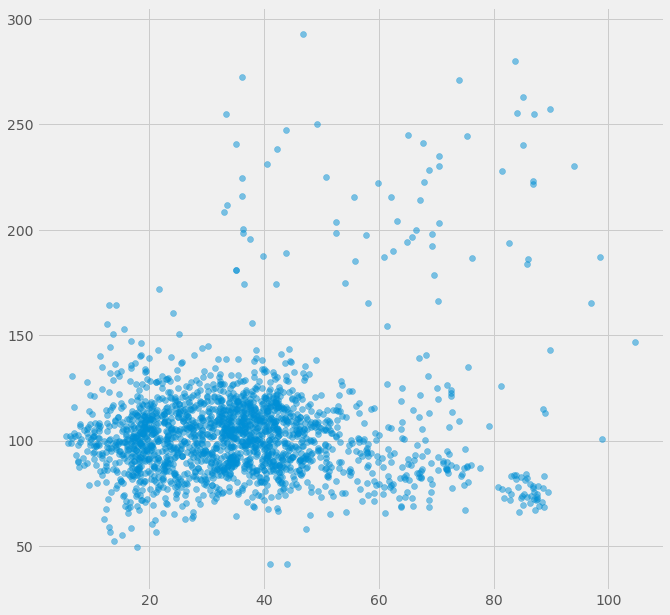

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Rapporto tra avviamenti/cessazioni (x 100)"],alpha=0.5)
plt.show()

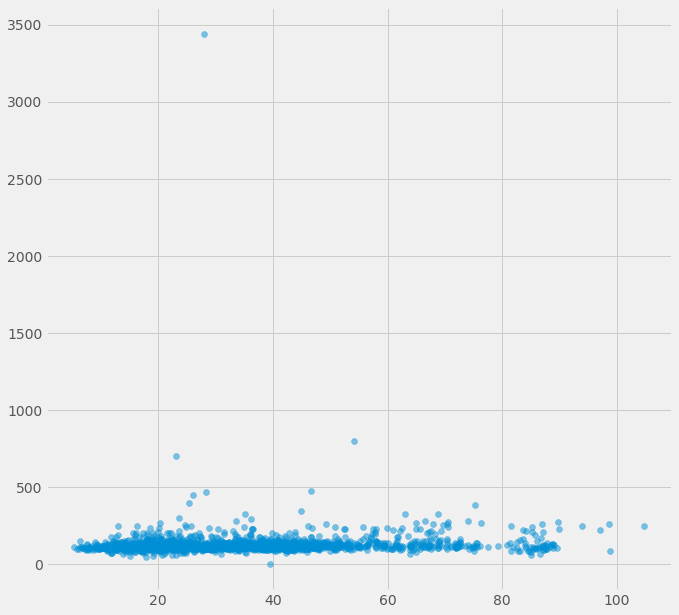

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Rapporto tra avviamenti/cessazioni di stranieri (x 100)"],alpha=0.5)
plt.show()

In [34]:
df[df["Rapporto tra avviamenti/cessazioni di stranieri (x 100)"]>500]

,Unnamed: 0,comune,year,Produzione pro-capite Rifiuti Urbani,Reddito imponibile medio per contribuente,Numero medio componenti per famiglie,% di Raccolta Differenziata,Reddito imponibile medio per residente,Rapporto tra avviamenti/cessazioni (x 100),Rapporto tra avviamenti/cessazioni di stranieri (x 100),...,Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione,Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione,Percentuale di avviamenti a termine,Percentuale studenti con esito negativo - secondaria I grado,Numero interventi di controllo per abitante,Tasso di famiglie che chiedono integrazione canoni di locazione (x 1000),Percentuale studenti stranieri iscritti alle scuole secondarie di primo grado,Percentuale studenti stranieri iscritti alle scuole secondarie di secondo grado,Indice di vecchiaia (x 100),Quoziente di incremento naturale (x 1.000)
142,142,Fabbriche di Vergemoli,2013,948.141809,19092.842105,3.651786,54.083138,9756.488998,175.000000,800.000000,...,NaN,NaN,140.259740,0.000000,NaN,0.000000,15.384615,10.000000,458.461538,-26.894866
874,874,Careggine,2009,543.719008,16708.638158,2.108014,23.112935,8395.745455,100.000000,700.000000,...,NaN,NaN,67.391304,0.000000,0.000000,11.111111,0.000000,363.461538,-13.223140,NaN
997,997,Montecatini Val di Cecina,2012,676.108049,19423.715116,2.084005,28.032712,11050.316428,77.188329,3442.857143,...,NaN,NaN,86.941581,7.142857,6.904488,10.714286,7.692308,296.703297,-8.820287,NaN


Il valore di Montecatini (indice=997) è un po' sospetto ma non abbastanza da giustificare l'eliminazione. 
Potrebbero essere state aperte 34 nuove imprese da stranieri in un soo anno. Poco probabile ma non impossibile. 

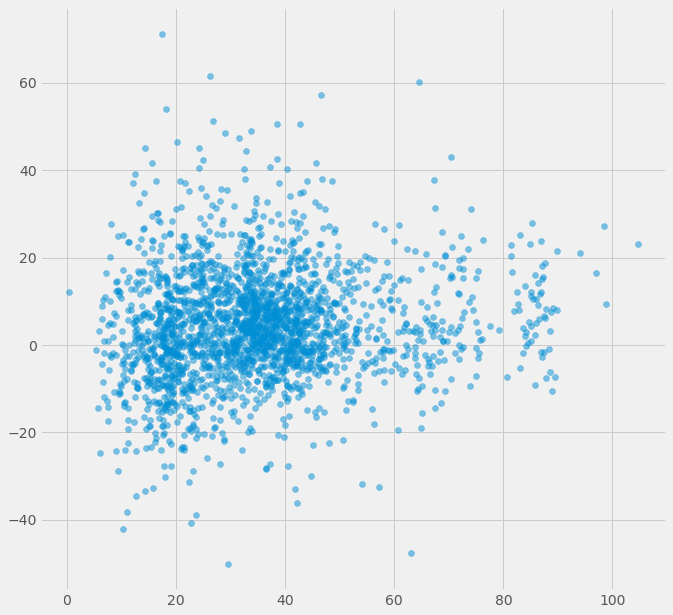

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Quoziente di incremento totale (x 1.000)"],alpha=0.5)
plt.show()

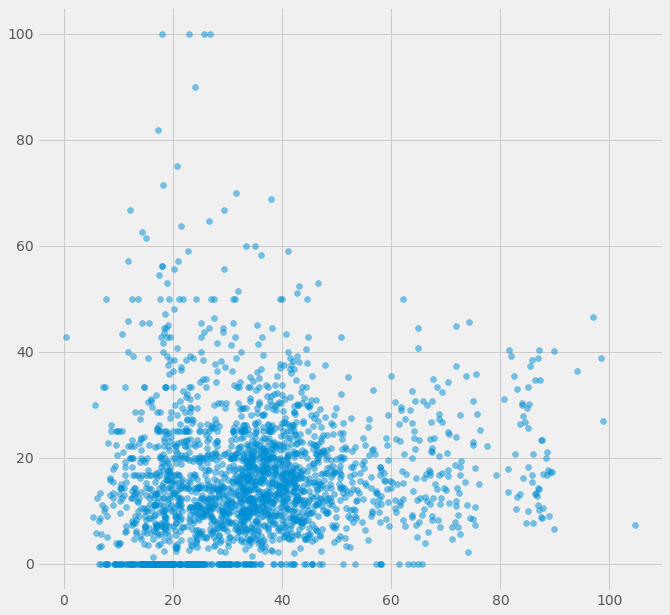

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Percentuale nati di cittadinanza non italiana"],alpha=0.5)
plt.show()

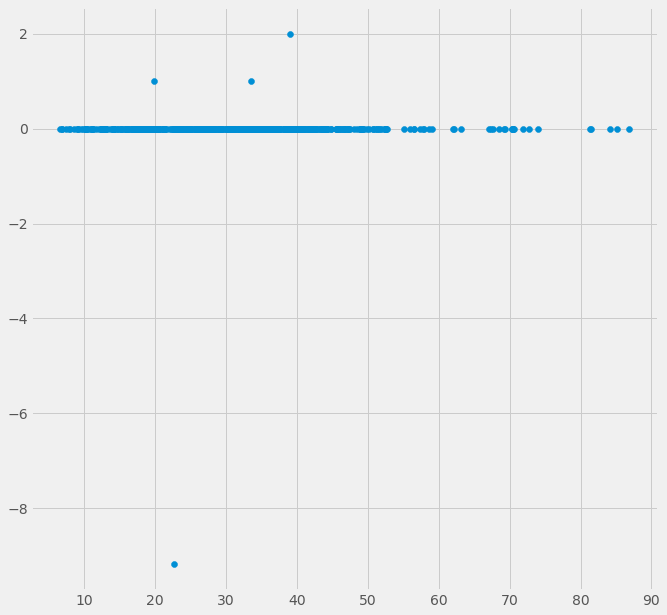

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione"])
plt.show()

In [38]:
df[df["Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione"]>0]

,Unnamed: 0,comune,year,Produzione pro-capite Rifiuti Urbani,Reddito imponibile medio per contribuente,Numero medio componenti per famiglie,% di Raccolta Differenziata,Reddito imponibile medio per residente,Rapporto tra avviamenti/cessazioni (x 100),Rapporto tra avviamenti/cessazioni di stranieri (x 100),...,Superamento dei limiti normativi dovuti a Srb: numero superamenti limite di esposizione e limite di attenzione,Superamento dei limiti normativi dovuti a impianti Rtv: numero superamenti limite di esposizione e limite di attenzione,Percentuale di avviamenti a termine,Percentuale studenti con esito negativo - secondaria I grado,Numero interventi di controllo per abitante,Tasso di famiglie che chiedono integrazione canoni di locazione (x 1000),Percentuale studenti stranieri iscritti alle scuole secondarie di primo grado,Percentuale studenti stranieri iscritti alle scuole secondarie di secondo grado,Indice di vecchiaia (x 100),Quoziente di incremento naturale (x 1.000)
1537,1537,Poppi,2008,589.013304,20887.279740,2.364188,19.920517,11707.330219,91.631799,91.228070,...,0,1,80.365297,1.212121,7.207891,21.818182,15.546218,186.828645,-0.633513,NaN
2107,2107,Gambassi Terme,2010,543.164300,19528.964420,2.542753,33.537979,11578.734888,211.958763,278.082192,...,0,1,102.237354,6.500000,10.948905,18.750000,8.163265,166.771654,-3.042596,NaN
2235,2235,Prato,2010,812.332470,22381.257024,2.486781,39.094835,12601.577067,110.425116,135.831158,...,0,2,78.195547,5.885569,8.000000,16.979327,24.963557,14.187673,142.465855,1.00526


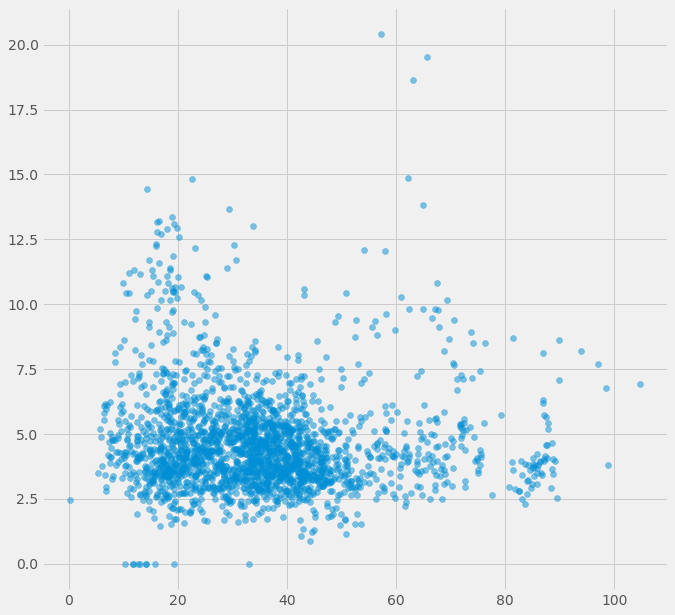

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Tasso di pensioni sociali e assegni sociali (x 100)"],alpha=0.5)
plt.show()

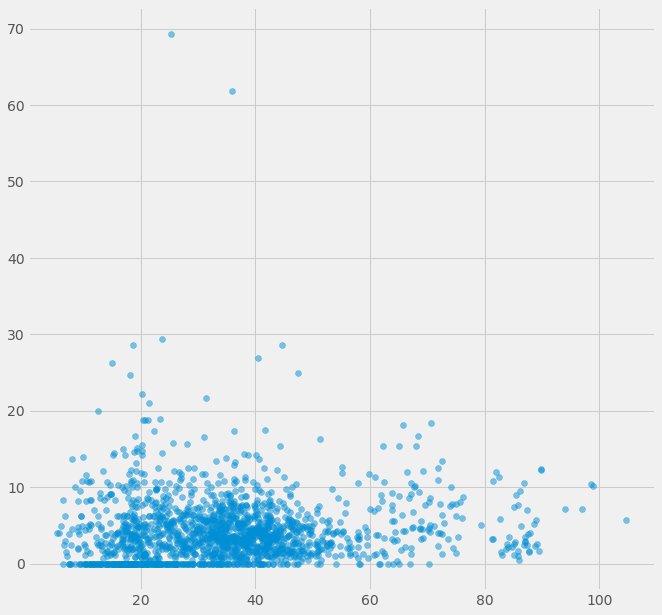

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Percentuale studenti con esito negativo - secondaria I grado"],alpha=0.5)
plt.show()

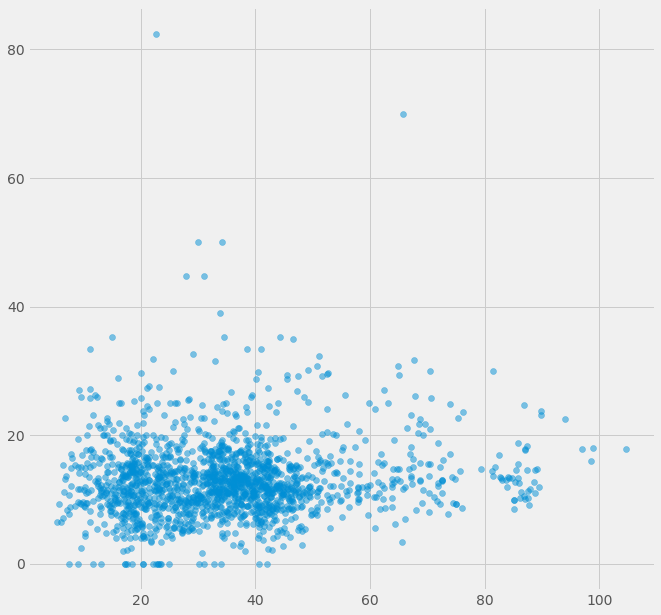

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(df["% di Raccolta Differenziata"],df["Percentuale studenti con esito negativo - secondaria II grado"],alpha=0.5)
plt.show()

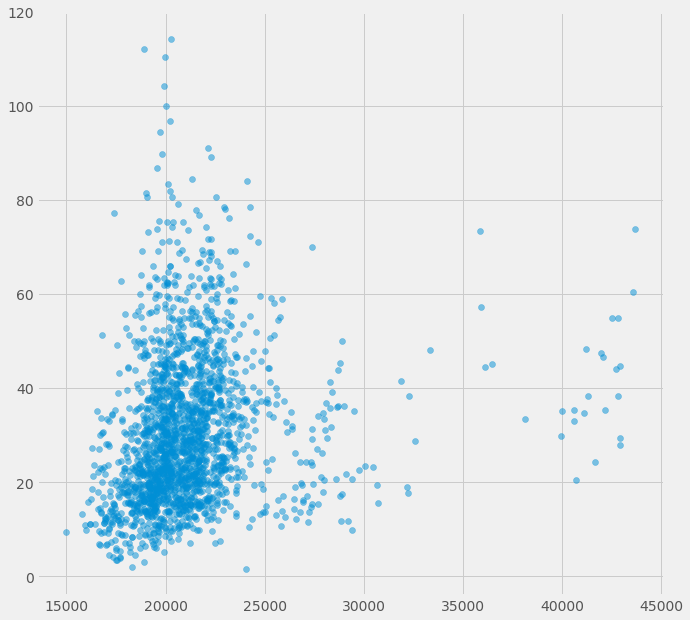

In [42]:
plt.figure(figsize=(10,10))
df_new = df[df["Tasso grezzo di disoccupazione (x100)"]<100]
plt.scatter(df_new["Reddito imponibile medio per contribuente"],df_new["Tasso grezzo di disoccupazione stranieri (x100)"],alpha=0.5)
plt.show()

**Analisi per Anno**

Esaminiamo ora anno per anno tutti gli indicatori.
Costruiamo dei boxplot che mostrano mediane e quantili per ogni indicatore anno dopo anno. 

/Library/Python/2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


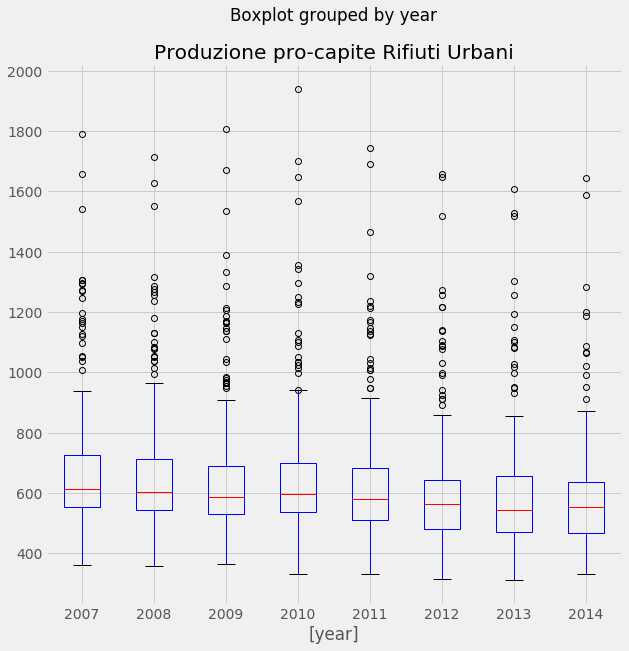

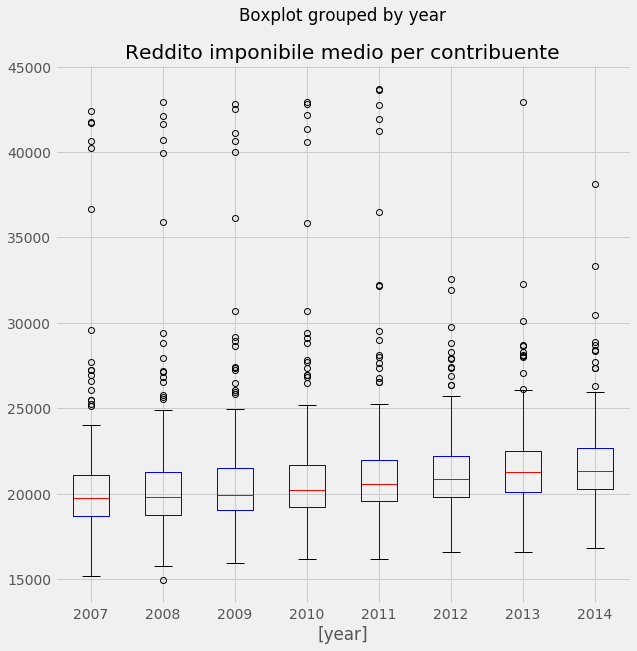

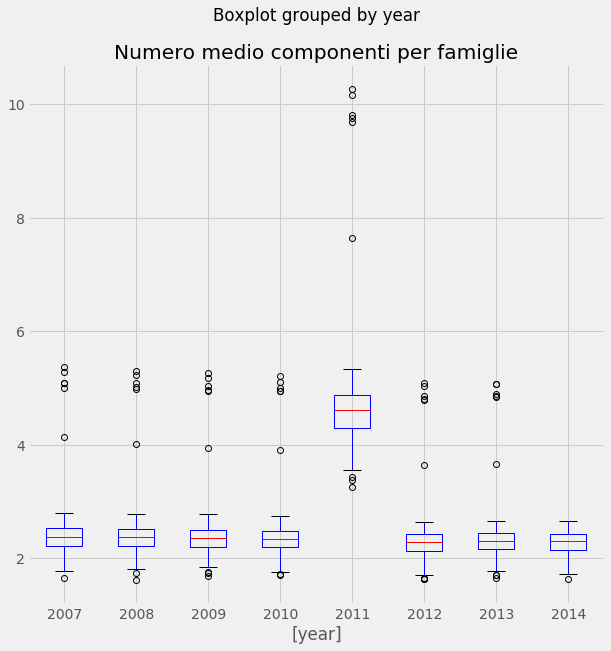

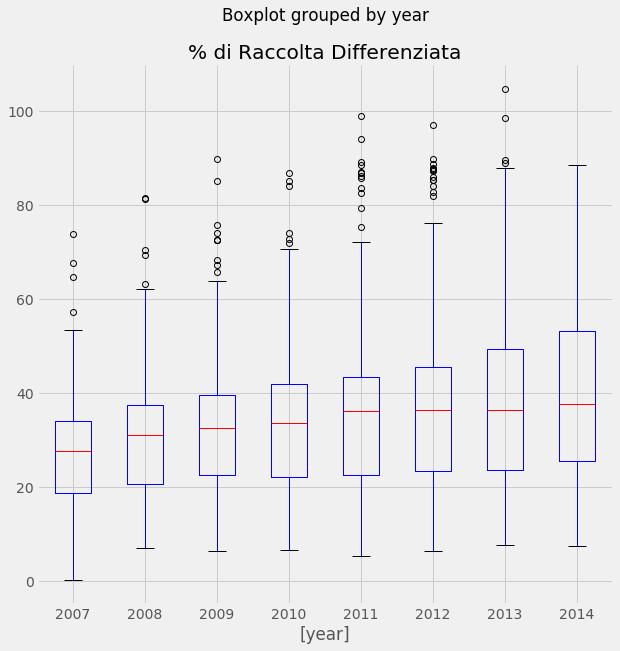

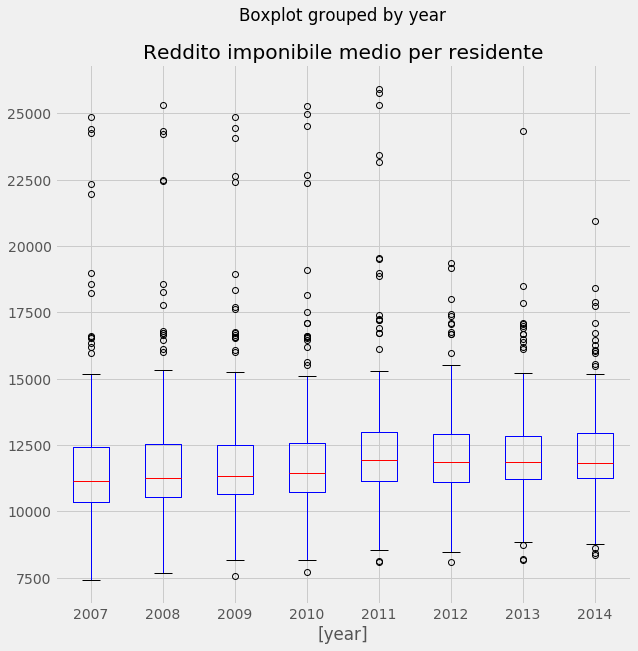

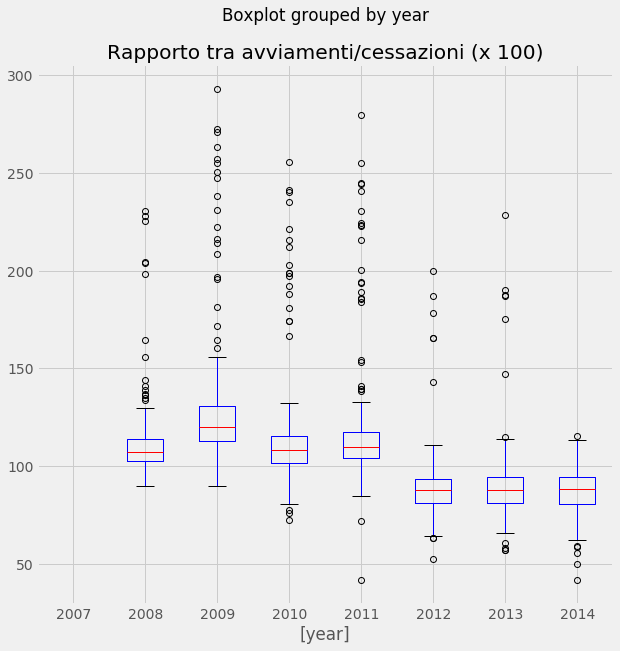

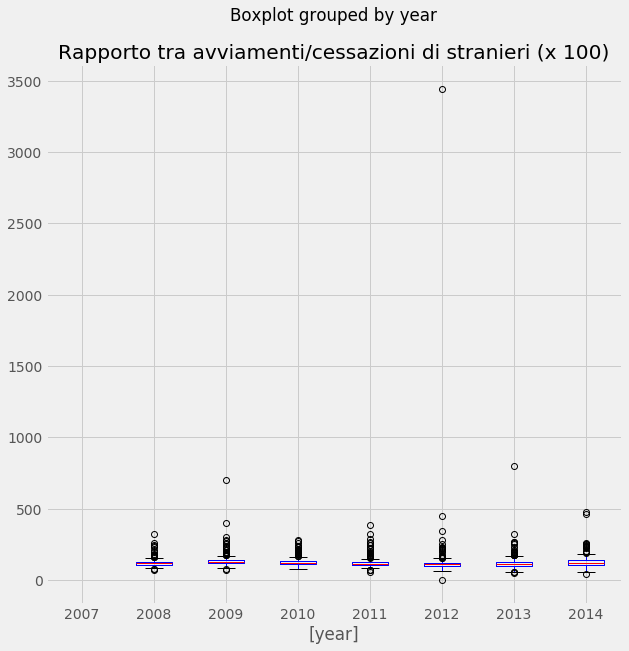

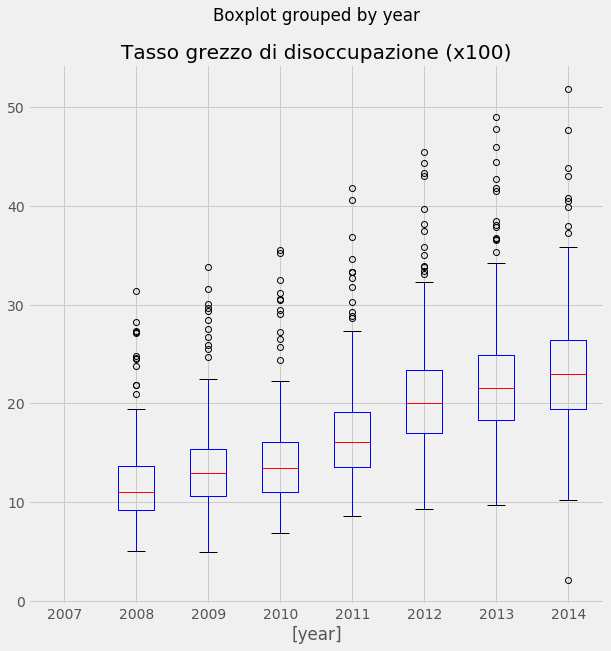

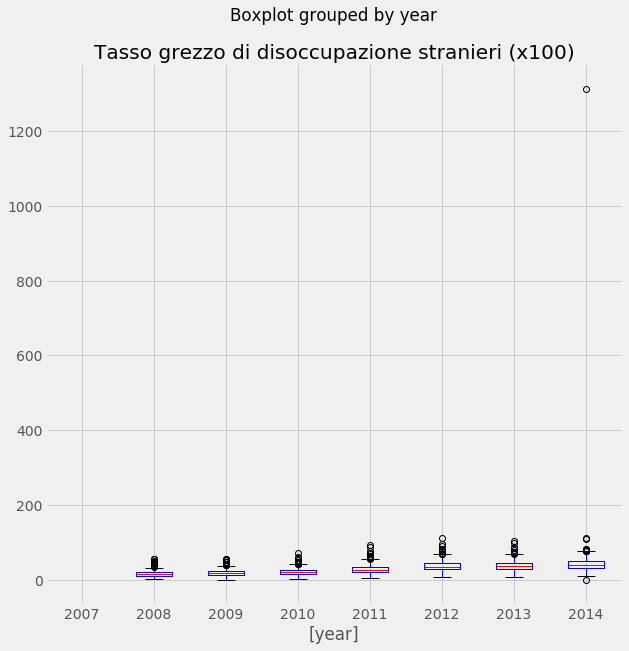

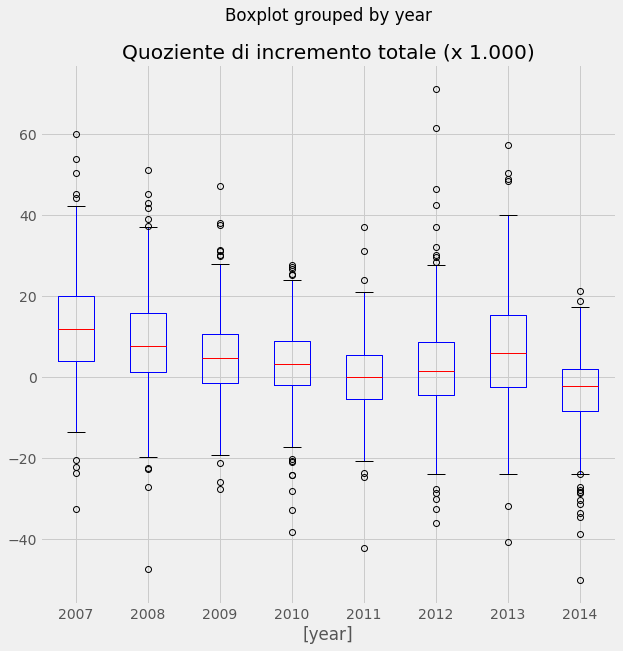

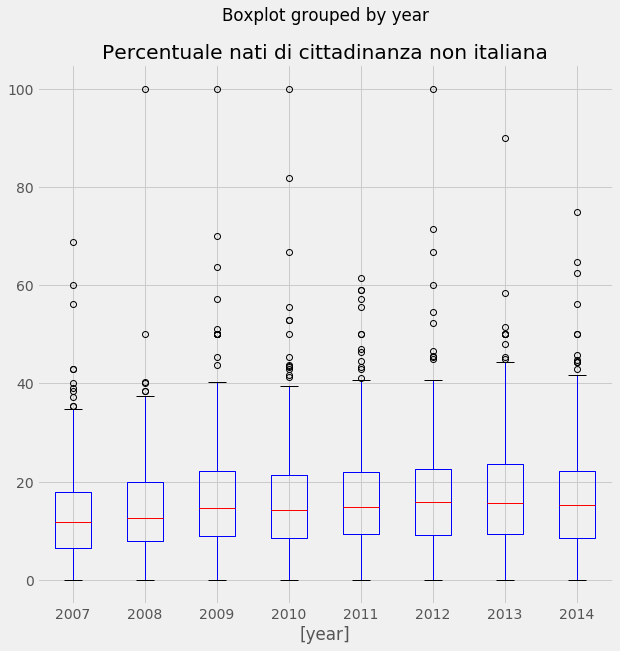

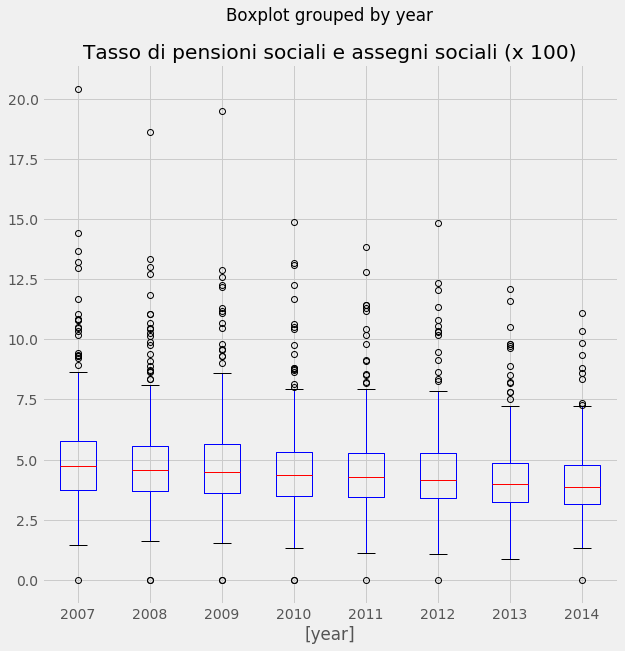

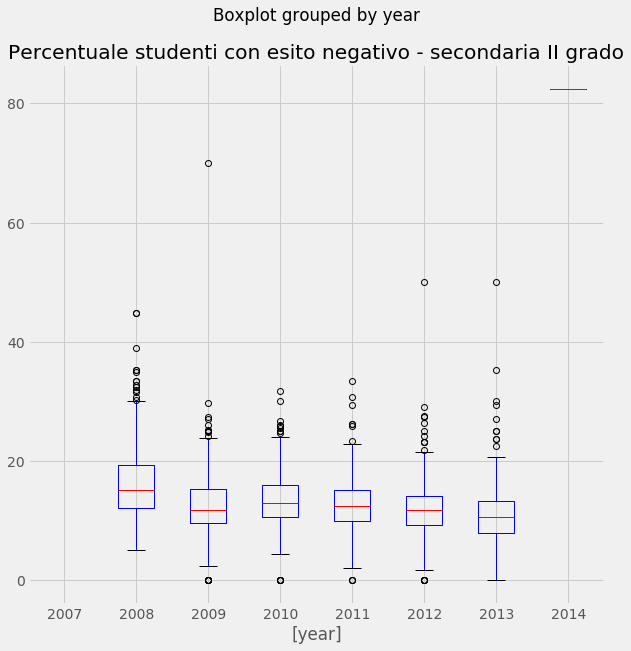

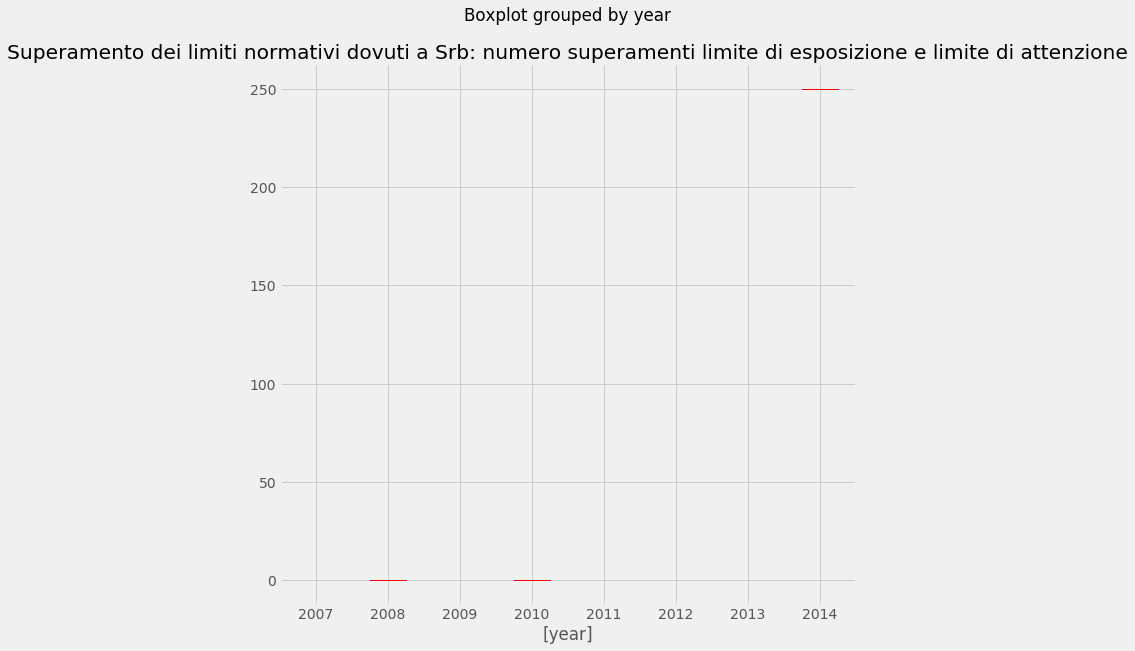

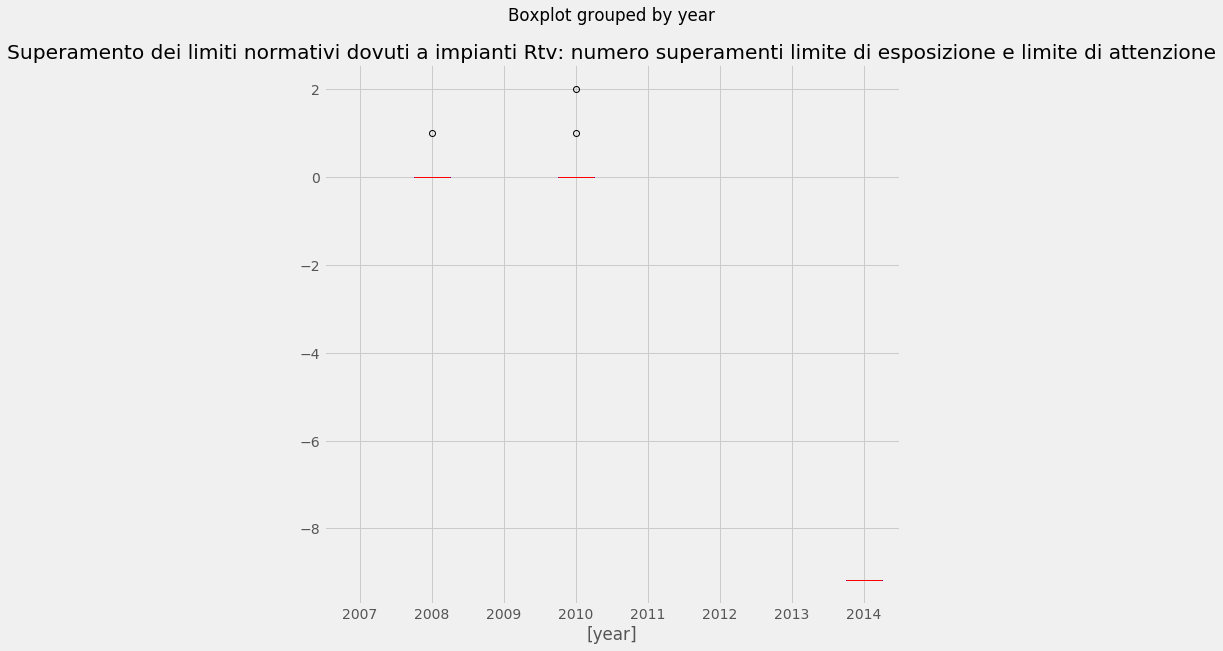

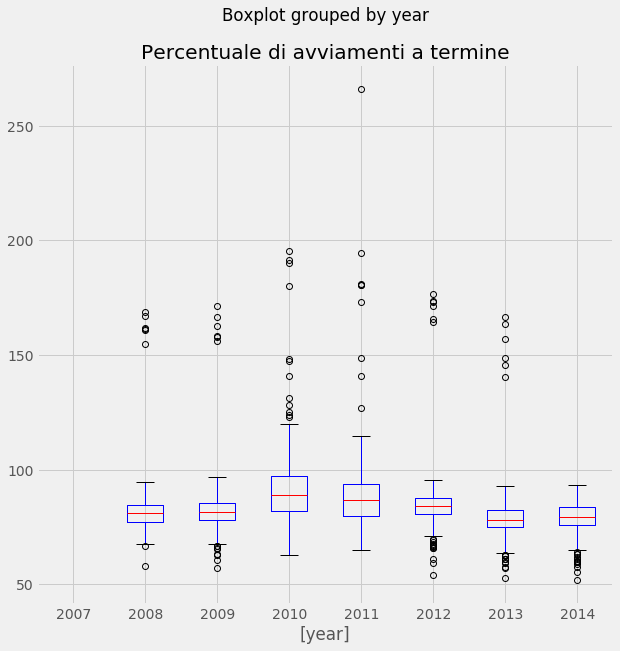

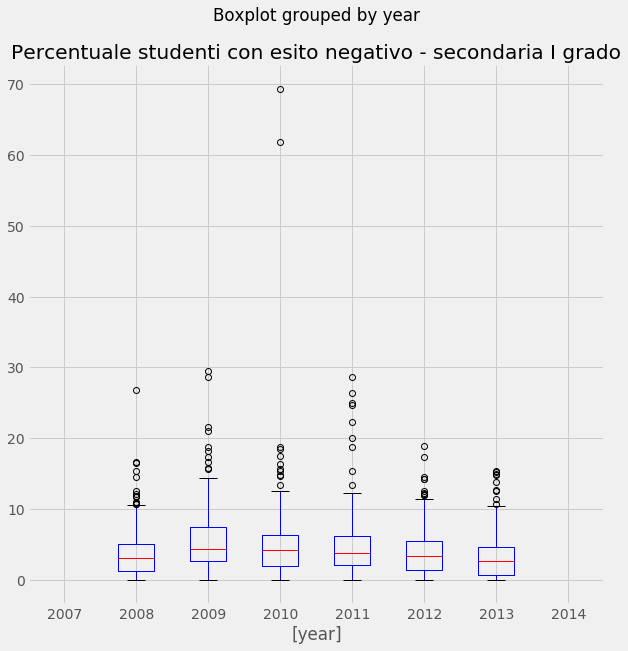

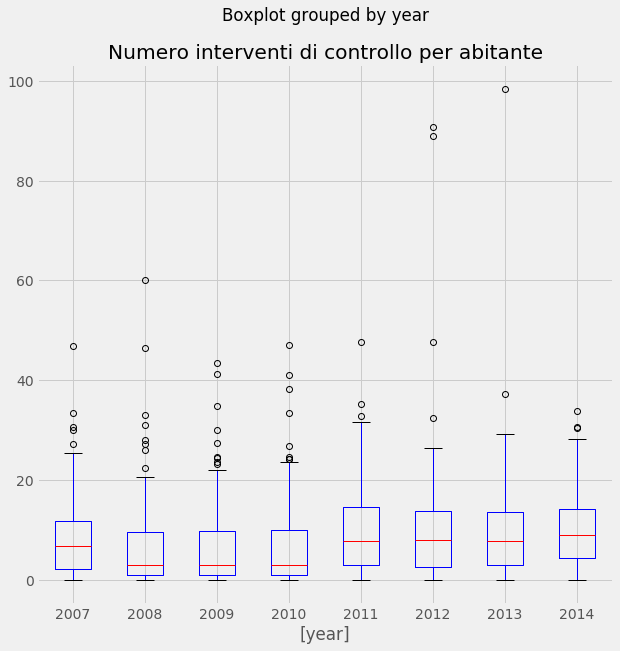

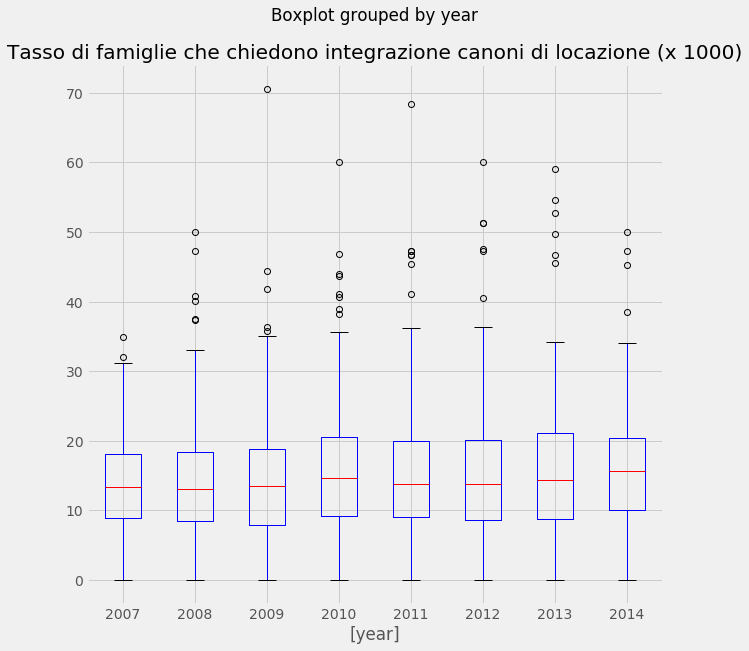

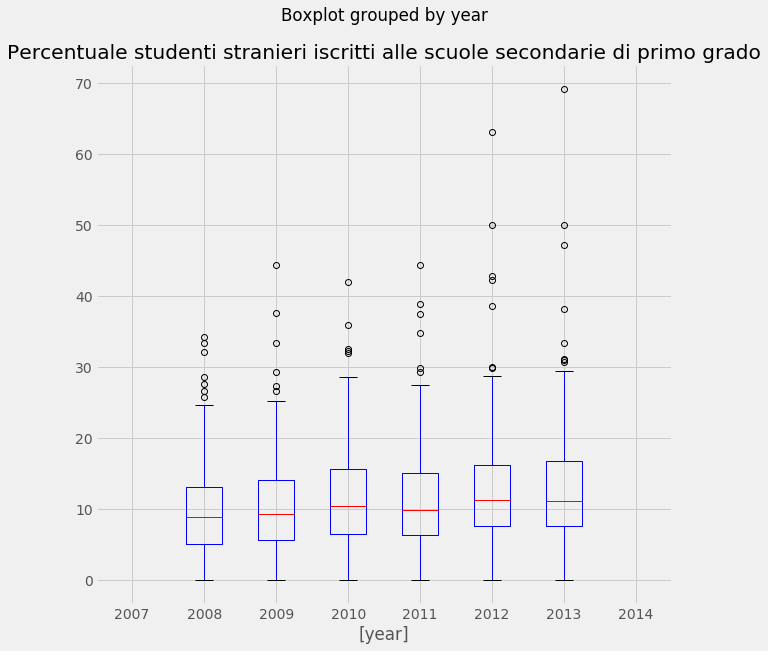

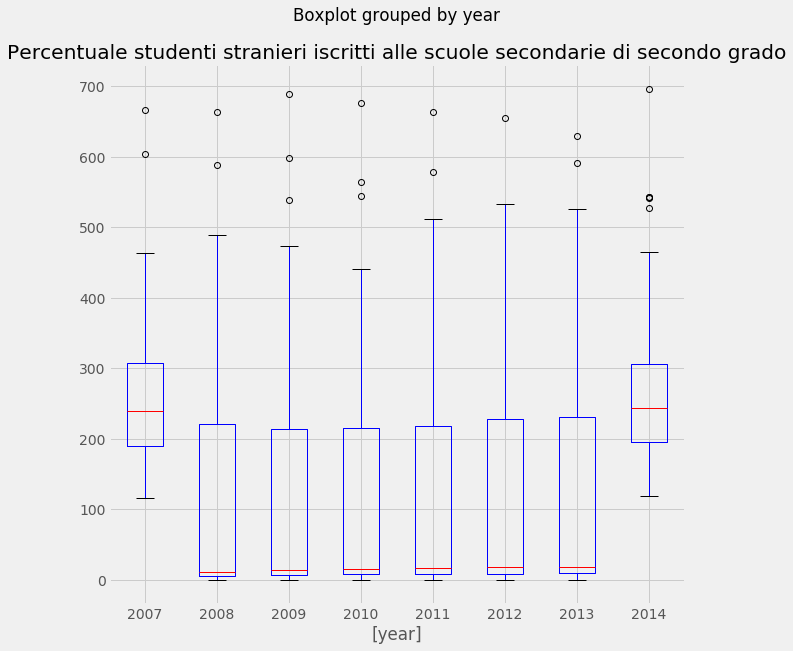

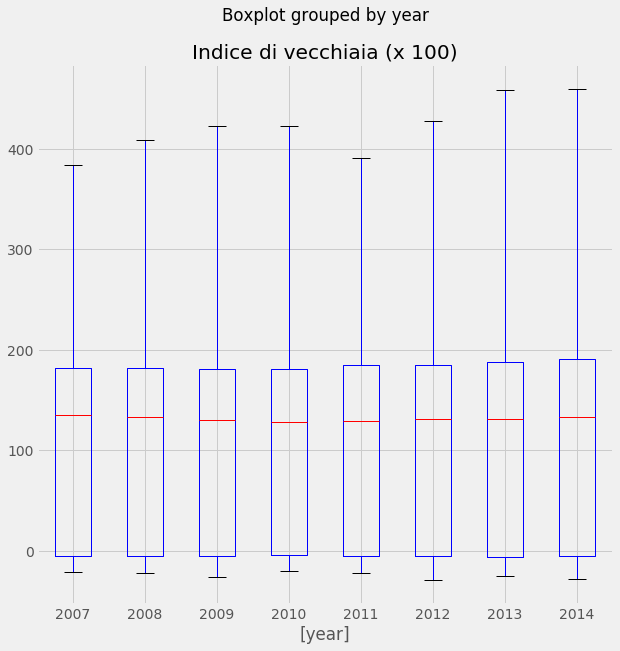

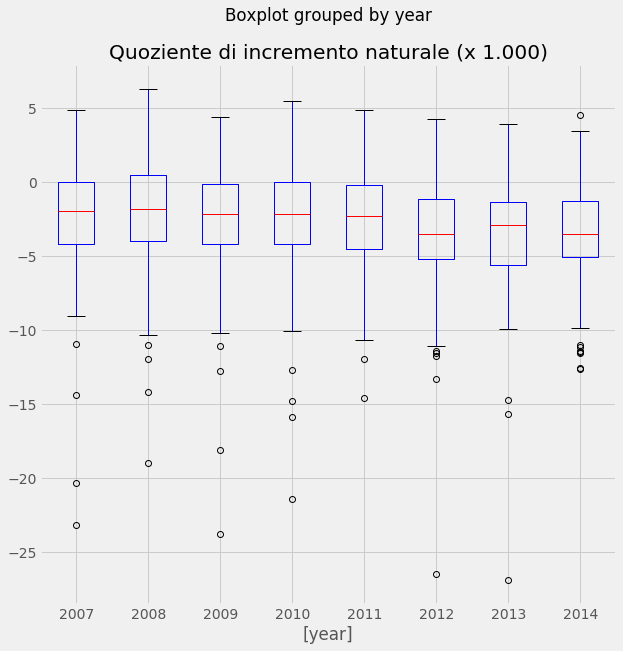

In [43]:
for k in df.keys()[3:]:
    df.boxplot(column=[k], by=['year'],figsize=(10,10)) 